In [46]:
import drjit as dr
import mitsuba as mi
import numpy as np
import matplotlib.pyplot as plt
import tqdm as tqdm

print(mi.variants())
mi.set_variant("scalar_rgb")

['scalar_mono', 'scalar_mono_double', 'scalar_rgb', 'scalar_spectral', 'llvm_ad_rgb', 'llvm_ad_rgb_double']


In [47]:
# Clear the render folder
import os
import shutil

folder = "renders"
for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print("Failed to delete %s. Reason: %s" % (file_path, e))

In [48]:
'''wind_speeds = [0.1, 1, 5, 10, 20, 30, 37]
zenith_angles = [0, 30, 45, 60, 90]
emitter_heights = np.sin(np.deg2rad(zenith_angles))
emitter_distances = np.cos(np.deg2rad(zenith_angles))
emitter_positions = np.array([emitter_distances, emitter_heights]).T

# Scale the heights with a factor of 10
emitter_positions[:, 1] *= 10

# Scale the distances with a factor of 100
emitter_positions[:, 0] *= 100

progress = tqdm.tqdm(total=len(emitter_positions) * len(wind_speeds))
for (z, y) in emitter_positions:
    for wind_speed in wind_speeds:
        scene = f"""
                    <scene version='3.0.0'>
                        <default name="spp" value="256"/>
                        <default name="res" value="256"/>

                        <integrator type='direct'/>

                        <sensor type="perspective" id="sensor">
                            <transform name="to_world">
                                <lookat target="0.0, 0.0, 1.25"
                                        origin="0.0, -12.0, 5.0"
                                        up    ="0.0, 0.0, 1.0"/>
                            </transform>

                            <sampler type="independent">
                                <integer name="sample_count" value="$spp"/>
                            </sampler>

                            <film type="hdrfilm">
                                <rfilter type="box"/>
                                <integer name="width"  value="$res"/>
                                <integer name="height" value="$res"/>
                            </film>
                        </sensor>

                        <shape type="rectangle" id="ocean">
                            <transform name="to_world">
                                <scale value="100.0"/>
                                <translate x="0.0" y="0.0" z="-0.5"/>
                            </transform>
                            
                            <bsdf type="oceanic_legacy">
                                <integer name="channel" value="3"/>
                                <integer name="visual_type" value="0"/>
                                <float name="wavelength" value="2.2"/>
                                <float name="wind_speed" value="{wind_speed}"/>
                                <float name="wind_direction" value="0"/>
                                <float name="chlorinity" value="19"/>
                                <float name="pigmentation" value="0.3"/>
                                <float name="alpha" value="50"/>
                            </bsdf>
                        </shape>

                        <emitter type="directional" id="light1">
                            <vector name="direction" value="x="0" y="{z}" z="{y}"/>
                            <rgb name="intensity" value="100.0"/>
                        </emitter>
                    </scene>
                """
        
        # Parse the scene
        scene = mi.load_string(scene)

        # Rendering
        image = mi.render(scene, spp=32)

        plt.title(f"Wind speed: {wind_speed} m/s, Emitter position: ({round(z, 2)}, {round(y, 2)})")
        plt.axis("off")
        plt.imshow(image ** (1.0 / 2.2)); # approximate sRGB tonemapping

        # Save the image in /renders
        plt.savefig(f"renders/wind_speed_{wind_speed}_{round(z, 2)}_{round(y, 2)}.png")
        plt.close()

        progress.update(1)
progress.close()'''

'wind_speeds = [0.1, 1, 5, 10, 20, 30, 37]\nzenith_angles = [0, 30, 45, 60, 90]\nemitter_heights = np.sin(np.deg2rad(zenith_angles))\nemitter_distances = np.cos(np.deg2rad(zenith_angles))\nemitter_positions = np.array([emitter_distances, emitter_heights]).T\n\n# Scale the heights with a factor of 10\nemitter_positions[:, 1] *= 10\n\n# Scale the distances with a factor of 100\nemitter_positions[:, 0] *= 100\n\nprogress = tqdm.tqdm(total=len(emitter_positions) * len(wind_speeds))\nfor (z, y) in emitter_positions:\n    for wind_speed in wind_speeds:\n        scene = f"""\n                    <scene version=\'3.0.0\'>\n                        <default name="spp" value="256"/>\n                        <default name="res" value="256"/>\n\n                        <integrator type=\'direct\'/>\n\n                        <sensor type="perspective" id="sensor">\n                            <transform name="to_world">\n                                <lookat target="0.0, 0.0, 1.25"\n             

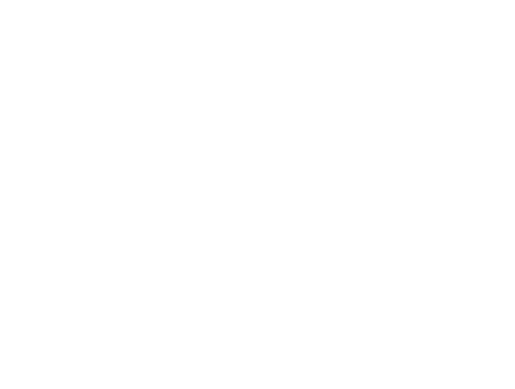

In [49]:
# Example from file
scene = mi.load_file("../scenes/ocean.xml")

# Rendering
image = mi.render(scene, spp=32)

plt.axis("off")
plt.imshow(image) # approximate sRGB tonemapping
#bmp = scene.sensors()[0].film().bitmap()